### Importing libraries

In [2]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd


### Loading the data

In [4]:
col_list = ["Source", "Target", "Rating", "Time"]
df = pd.read_csv('/content/soc-sign-bitcoinalpha.csv',names=col_list)
df.head()

,Source,Target,Rating,Time
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400


In [5]:
df.drop({"Rating","Time"}, axis = 1, inplace = True)
df.head()

,Source,Target
0,7188,1
1,430,1
2,3134,1
3,3026,1
4,3010,1


### Creating the graph and adding the edges

In [26]:
s = df['Source'].values
t = df['Target'].values



G = nx.DiGraph()

# G.add_nodes_from(range(1,3783))

for i in range(len(s)):
  G.add_edge(s[i],t[i])


In [31]:
G.number_of_nodes()

3783

In [29]:
G.number_of_edges()

24186

In [11]:
df.shape

(24186, 2)

In [47]:
G.is_directed()

True

#### PAGERANK:

In [ ]:
d1 = nx.pagerank(G,alpha=0.8)

#### HITS:

In [42]:
h,a = nx.hits(G)

### Sorting the pagerank score and showing the top 10 nodes

In [73]:
d2 = sorted(d1.items(),key = lambda x:x[1], reverse=True)[:10]
df2 = pd.DataFrame(d2,columns=["node","pagerank"])
df2

,node,pagerank
0,1,0.017161
1,3,0.008691
2,4,0.007592
3,177,0.006209
4,7,0.006207
5,2,0.006161
6,11,0.005753
7,13,0.005366
8,10,0.005274
9,6,0.004561


### Sorting the hub scores and showing the top 10 nodes

In [74]:
d3 = sorted(h.items(),key = lambda x:x[1], reverse=True)[:10]
df3 = pd.DataFrame(d3,columns=["node","hub score"])
df3

,node,hub score
0,11,0.008538
1,177,0.006961
2,3,0.006884
3,2,0.006829
4,7,0.006701
5,8,0.006529
6,1,0.006409
7,22,0.006133
8,10,0.006024
9,26,0.005890


### Sorting the auth score and showing the top 10 nodes.

In [75]:
d4 = sorted(a.items(),key = lambda x:x[1], reverse=True)[:10]
df4 = pd.DataFrame(d4,columns=["node","auth score"])
df4

,node,auth score
0,11,0.007749
1,3,0.006953
2,2,0.006812
3,177,0.006192
4,7,0.006059
5,1,0.005881
6,26,0.005754
7,10,0.005389
8,5,0.005047
9,9,0.004981


### Distribution of the pagerank score across the nodes

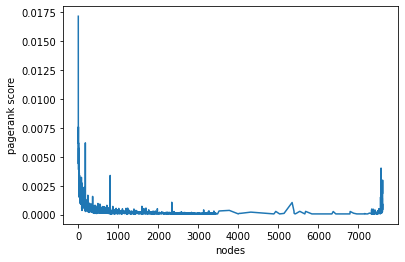

In [81]:
x = []
y = []
b = sorted(d1.items())
for i in range(len(b)):
  # print(b)
  x.append(b[i][0])
  y.append(b[i][1])

plt.plot(x,y)
plt.xlabel('nodes')
plt.ylabel('pagerank score')
plt.show()

### Distribution of the hub score across the nodes

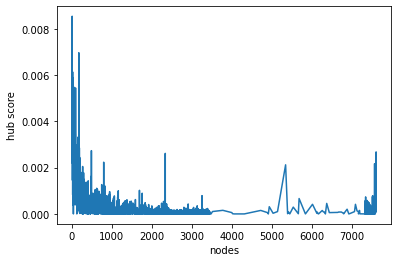

In [82]:
x = []
y = []
b = sorted(h.items())
for i in range(len(b)):
  # print(b)
  x.append(b[i][0])
  y.append(b[i][1])

plt.plot(x,y)
plt.xlabel('nodes')
plt.ylabel('hub score')
plt.show()

### Distribution of the auth score across the nodes

In [84]:
x = []
y = []
b = sorted(a.items())
for i in range(len(b)):
  # print(b)
  x.append(b[i][0])
  y.append(b[i][1])

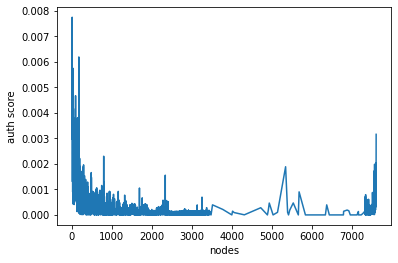

In [85]:
plt.plot(x,y)
plt.xlabel('nodes')
plt.ylabel('auth score')
plt.show()